**GRIP: The Sparks Foundation**

**#GRIPOCT2022**


**Task 1: Prediction using supervised machine learning**

Simple linear regression with python scikit-learn

**Problem Statement:** In this problem our task is to predict expected percent score of students based on no. of daily study hours.


**Author: Phule Suraj Anandrao**

**Import the relevant libraries**

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Load the data from a .csv format using pandas library**

In [48]:
data=pd.read_csv('http://bit.ly/w-data') # data is stored in the given link
print("Data imported sucessfully")
data.head()                              # Displays the first five rows of the dataframe

Data imported sucessfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [49]:
# Checking the presence of missing values in the data
data.isnull().values.any()

False

**Define the dependent and the independent variables**

In [50]:
# Following the regression equation, our dependent variable (y) is the Scores
y = data ['Scores']
# Similarly, our independent variable (x) is the Hours
x = data ['Hours']


**Explore the data**

Lets plot the scatterplot to check the relation between the Scores and the Hours.


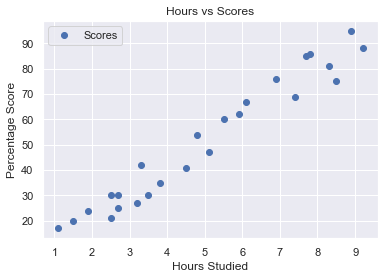

In [51]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the Scatterplot, we can clearly see that there is a **positive linear relationship** between the number of daily study hours and percentage score.

**Data Preparation**

Prepare a data as a dependent and independent variables:

x (hours studied) as a independent variable and 

y (Score) as a dependent variable



In [52]:
x = data.iloc[:, :-1].values    # iloc[] command is helps us to select a specific row or column from the data set. Gives data excluding last column observations.
y = data.iloc[:, 1].values      # Gives observations of 2nd column.

**Train_Test_Split**

Now we will split the data into training and testing sets with **splitting rule 80-20**. Here we use train_test_split method using sklearn library.

In [53]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0) 

**Training the model**

In [55]:
from sklearn.linear_model import LinearRegression  
regression = LinearRegression()  
regression.fit(x_train,y_train) 
print("Training completed successfully.")

Training completed successfully.


In [56]:
regression.intercept_         # Gives intercept of regression line

2.018160041434683

In [57]:
regression.coef_              # Gives slope of regression line

array([9.91065648])

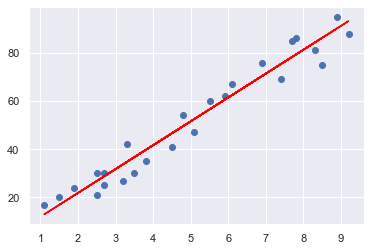

In [42]:
# Replotting regression line

regline= regression.intercept_ + regression.coef_*x
plt.scatter(x, y)
plt.plot(x, regline,color='red');
plt.show()

**Making Predictions**

Now we have trained our model, its time to make some predictions

In [58]:
print(x_test) # Testing data (In Hours)
y_pred = regression.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [59]:
# Comparing Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [60]:
# As our task, let predict the score when study hour is 9.25

hours = 9.25
pred = regression.predict([[hours]])
print(pred)

[93.69173249]


**Which shows that if student will study for 9.25 hours then he will get percent score of 93.69 %**

**Model Evaluation**
 
The most important task is to check the performance of the model.
To check the performance of the model R-square, Mean Square Error and Mean Absolute Error

In [61]:
from sklearn import metrics  

In [62]:
print('R_square:',regression.score(x_test,y_test))
print('Adjusted_R_squre:', 1 - (1-regression.score(x_test,y_test))*(len(y)-1)/(len(y)-x.shape[1]-1))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('MSE:', metrics.mean_squared_error(y_test,y_pred))

R_square: 0.9454906892105356
Adjusted_R_squre: 0.943120719176211
Mean Absolute Error: 4.183859899002975
MSE: 21.5987693072174


Here R_square value is .9454 which shows that 94.54 % of variation in the outcome (Dependent) variable is explained by independent variable. That is our model gives 94.54 % accurate results.

**Conclusions:**
   
   i)  Accuracy of our model is 94.54 %
   
   ii)  Model predicts that if a student studies for 9.25 hours per day then he/she will score 93.69 %.

**THANK YOU**